In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
real_data = pd.read_csv('../datasets/breast.csv')
real_data['Diagnosis'] = real_data['Diagnosis'].map({'M':0, 'B':1})
synthetic_data = pd.read_csv('../synthetic/GCSbc.csv')#GCSbc #TVAESbc
synthetic_data['Diagnosis'] = synthetic_data['Diagnosis'].map({'M':0, 'B':1})

In [52]:
real_data = pd.read_csv('../datasets/heart.csv')
synthetic_data = pd.read_csv('../synthetic/TVAEShd.csv')#GCSbc #TVAESbc

In [53]:
medgan_synthetic_data_path = '../synthetic/medganbc.npy'
run_medgan_results = False
if run_medgan_results:
    features = [    # Breast Cancer Wisconsin (Diagnostic)
        'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1',
        'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2',
        'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3', 
        'Diagnosis'
    ]
    synthetic_data  = np.load(medgan_synthetic_data_path)
    synthetic_data = pd.DataFrame(synthetic_data, columns=features)
    print(synthetic_data.shape)
    synthetic_data.head()

### Descriptive Statistics Comparison

In [54]:
real_data_stats = real_data.describe().transpose()
synthetic_data_stats = synthetic_data.describe().transpose()

absolute_difference_stats = (real_data_stats - synthetic_data_stats)
percentage_difference_stats = (absolute_difference_stats / real_data_stats) * 100
percentage_difference_stats.drop('count',axis=1,inplace=True)
percentage_difference_stats = percentage_difference_stats.add_suffix('_in_%')
percentage_difference_stats

,mean_in_%,std_in_%,min_in_%,25%_in_%,50%_in_%,75%_in_%,max_in_%
age,-2.93818,11.52352,0.00000,-6.25000,-1.78571,-1.63934,0.00000
sex,-18.83631,15.70067,NaN,-inf,0.00000,0.00000,0.00000
cp,-13.10765,37.01880,0.00000,0.00000,-33.33333,0.00000,0.00000
trestbps,1.16391,29.51065,0.00000,-1.66667,0.00000,1.42857,0.00000
chol,7.10396,39.89779,0.00000,1.42180,4.97925,9.09091,26.95035
fbs,96.26973,79.16184,NaN,NaN,NaN,NaN,0.00000
restecg,-2.38572,-0.49645,NaN,NaN,-100.00000,0.00000,0.00000
thalach,-3.52336,13.44334,0.00000,-7.86517,-3.26797,-1.80723,0.00000
exang,33.78991,12.35659,NaN,NaN,NaN,100.00000,0.00000
oldpeak,23.10620,13.71101,NaN,NaN,75.00000,12.50000,0.00000


### Distributions

In [55]:
def plot_distributions(real_data, synthetic_data, show_figures = 40):
    columns = real_data.columns
    for i, column in enumerate(columns):
        if synthetic_data[column].loc[0] == 0:
            continue
        if i >= show_figures:
            break
        real_data[column].plot(kind='density', label='Real Data', color='blue')
        synthetic_data[column].plot(kind='density', label='Synthetic Data', color='orange')
        plt.title(f'Distribution of {column}')
        plt.legend()
        plt.tight_layout()
        plt.show()

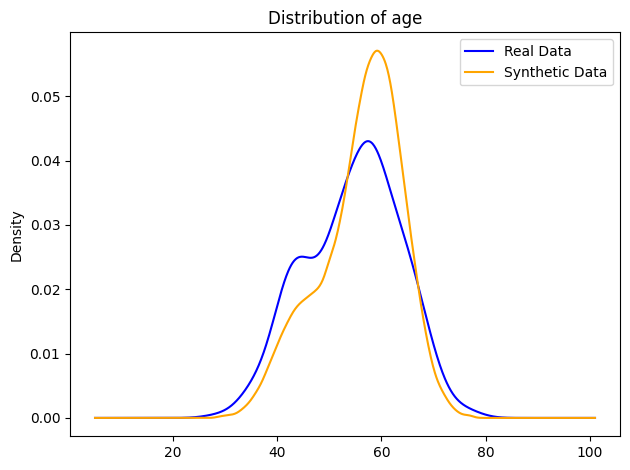

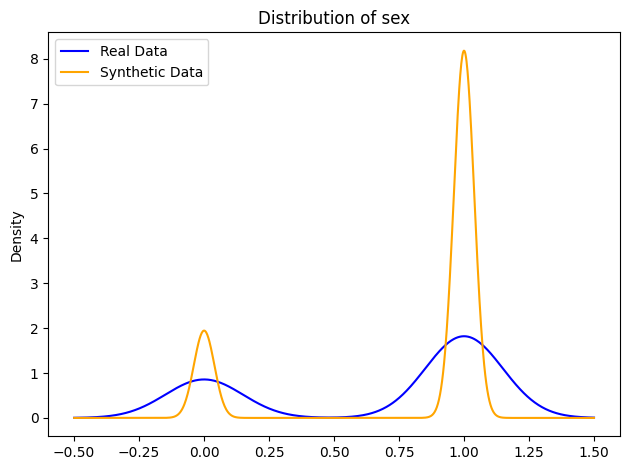

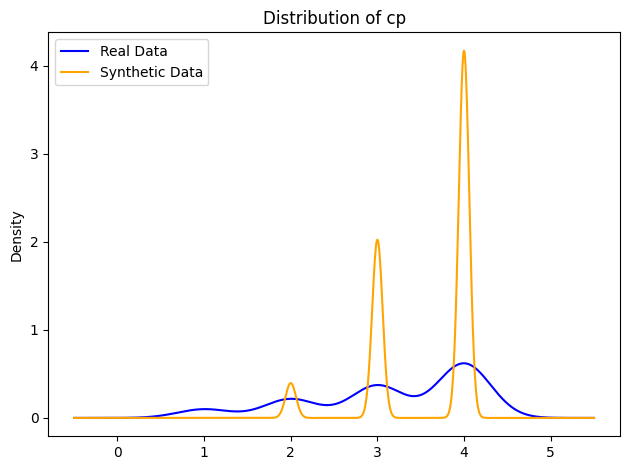

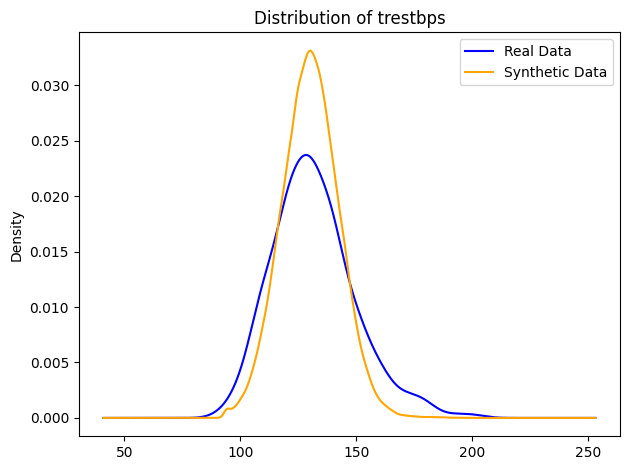

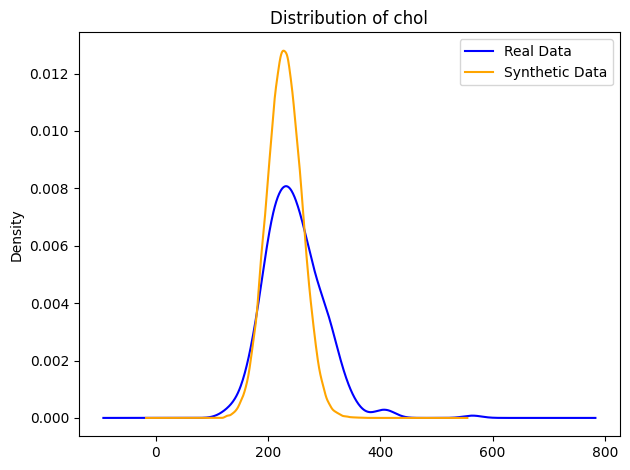

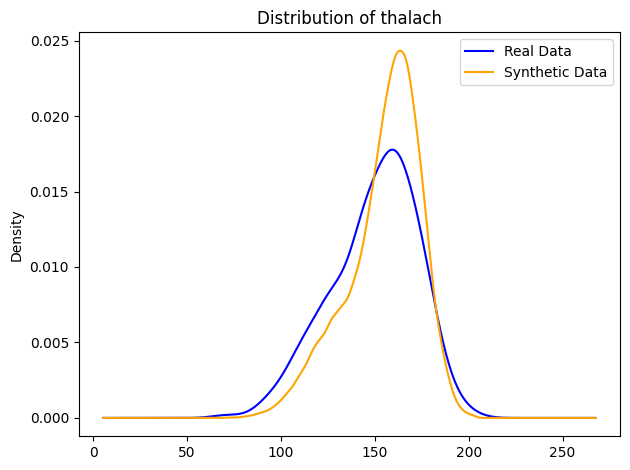

In [56]:
plot_distributions(real_data, synthetic_data, show_figures=10)

### Kolmogorov–Smirnov test

The KS Statistic quantifies the distance between the empirical distribution functions of the two samples. A higher value indicates a larger discrepancy between the distributions of the real and synthetic data for that particular feature.

A lower p-value <0.05 suggests that the differences between the distributions are statistically significant.

In [57]:
from scipy.stats import ks_2samp
def ks_test_on_dataframes(real_data, synthetic_data):
    results = {}
    for column in real_data.columns:
        if column in synthetic_data.columns:
            stat, p_value = ks_2samp(real_data[column], synthetic_data[column])
            results[column] = {'KS Statistic': stat, 'p-value': p_value}
    return results
ks_results = ks_test_on_dataframes(real_data, synthetic_data)
pd.set_option('display.float_format', lambda x: f'{x:.5f}')
pd.DataFrame(ks_results).transpose()

,KS Statistic,p-value
age,0.10937,0.00134
sex,0.12806,0.00009
cp,0.18073,0.00000
trestbps,0.11420,0.00069
chol,0.20209,0.00000
fbs,0.14297,0.00001
restecg,0.01841,0.99992
thalach,0.12417,0.00016
exang,0.11040,0.00116
oldpeak,0.15995,0.00000


###  Correlation Analysis

In [58]:
correlation_real = real_data.corr()
correlation_synthetic = synthetic_data.corr()

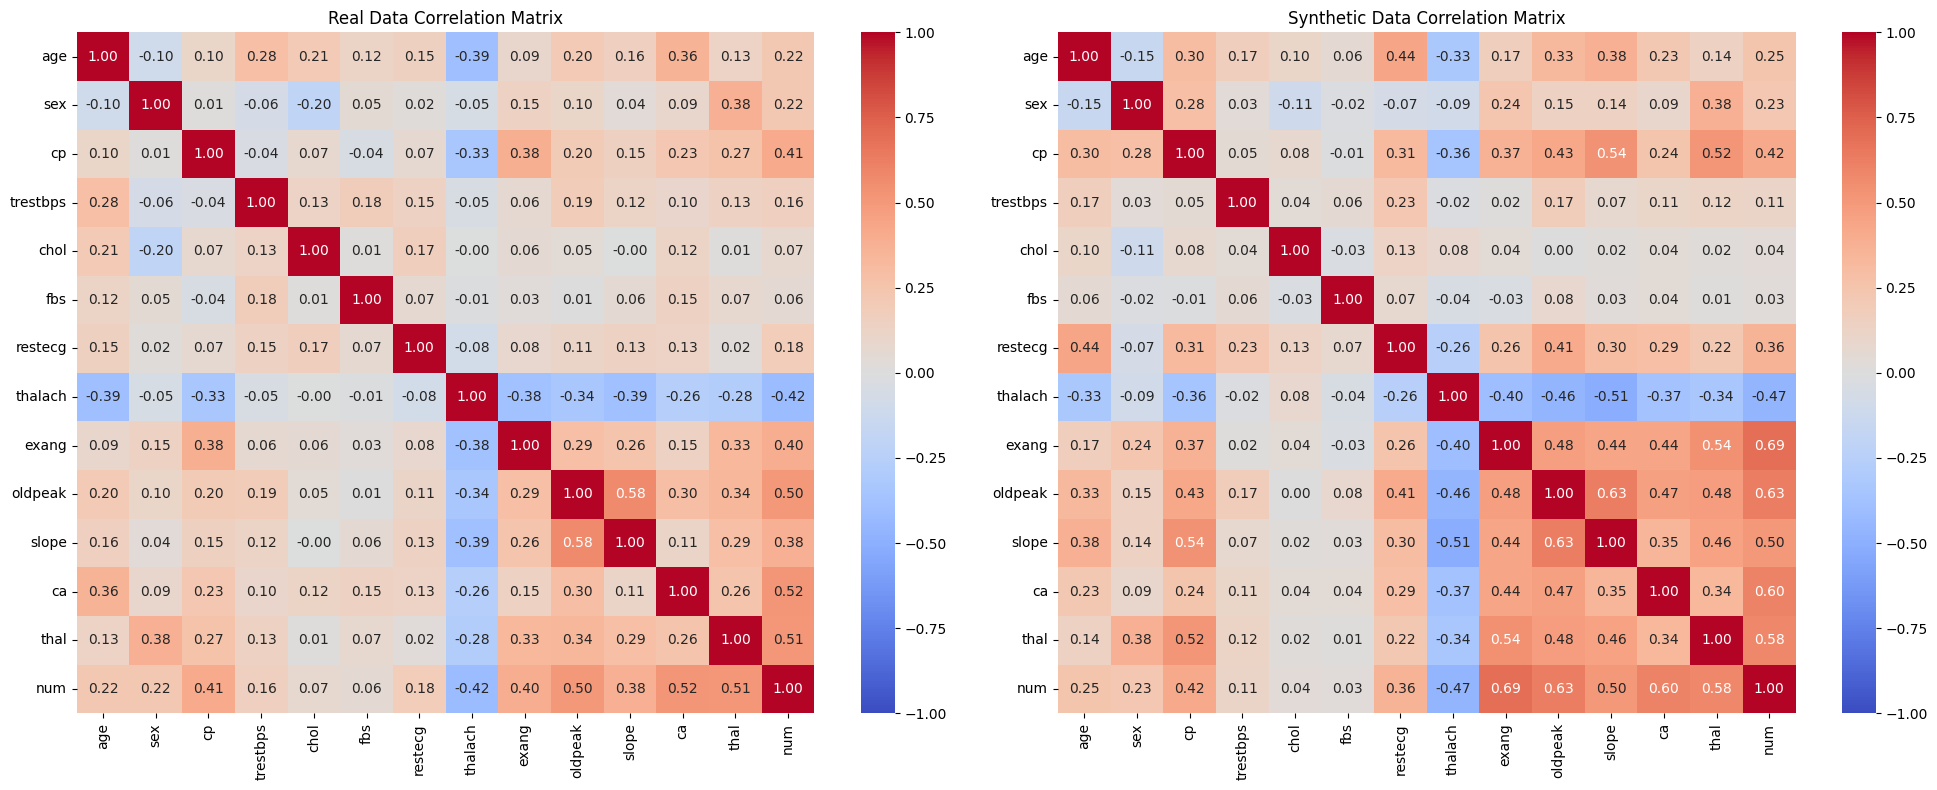

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.heatmap(correlation_real, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Real Data Correlation Matrix')
sns.heatmap(correlation_synthetic, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Synthetic Data Correlation Matrix')
plt.tight_layout()
plt.show()

#### Difference Correlation Maxtrix

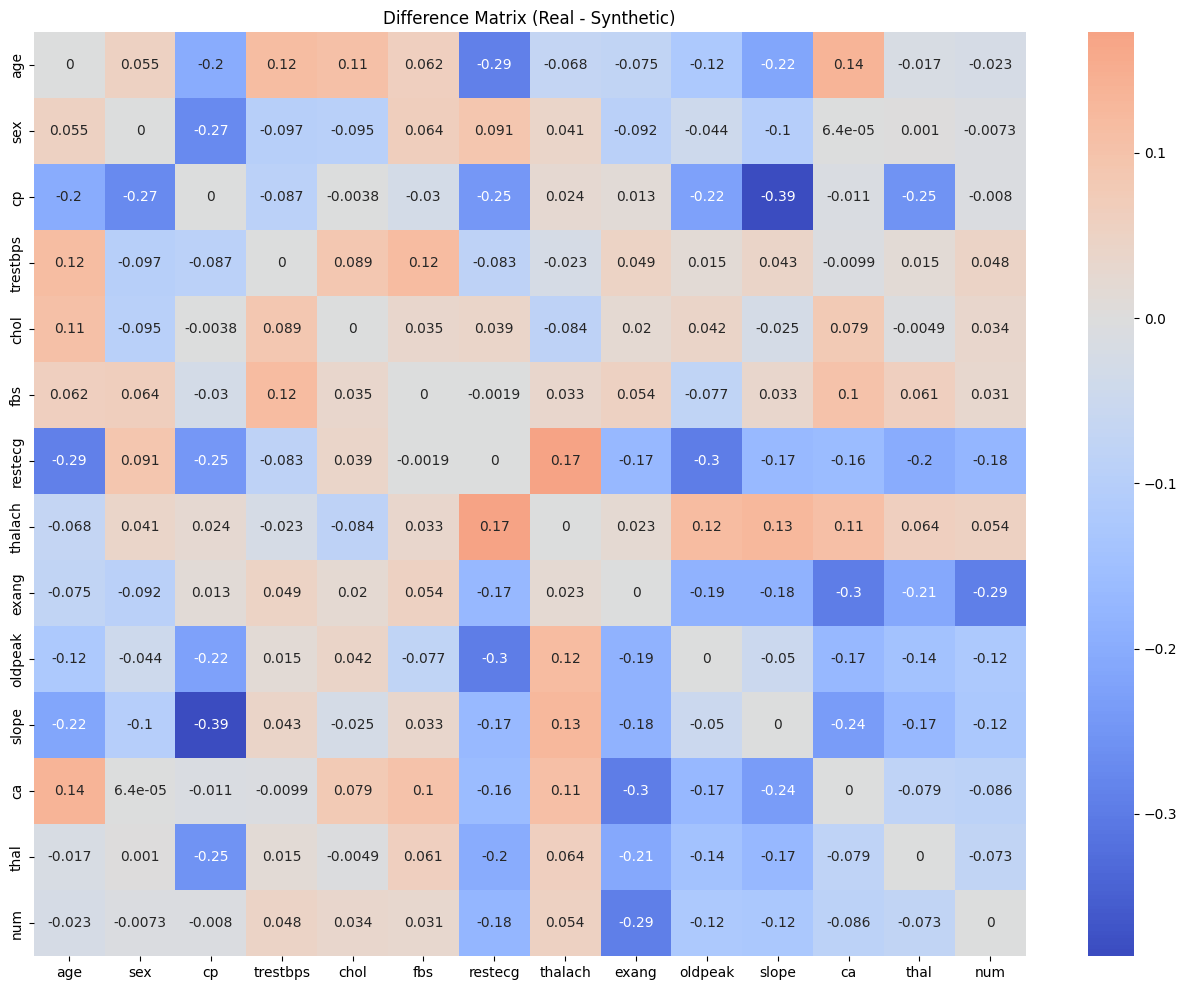

In [60]:
difference_matrix = correlation_real - correlation_synthetic
plt.figure(figsize=(16, 12)) 
sns.heatmap(difference_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Difference Matrix (Real - Synthetic)')
plt.show()

Correlation of Correlations

In [61]:
# Extract the upper triangular part of the correlation matrices excluding the diagonal
triu_indices = np.triu_indices_from(correlation_real, k=1)
real_upper = correlation_real.values[triu_indices]
synthetic_upper = correlation_synthetic.values[triu_indices]
# Compute the correlation between the upper triangular values
comparison_corr = np.corrcoef(real_upper, synthetic_upper)[0, 1]
print(f'Correlation between real and synthetic correlation matrices: {comparison_corr}')

Correlation between real and synthetic correlation matrices: 0.8995056845362512
